# **Importing Libraries**

In [134]:
import cv2
import glob
from skimage.transform import resize
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from tqdm.auto import tqdm
import time
from skimage.color import rgb2gray
from google.colab.patches import cv2_imshow

# **Preparing The Data**

In [135]:
bears = []
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Fiz437e/data/black_bear'):
    for filename in filenames:
        bears.append(os.path.join(dirname, filename))

elks = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Fiz437e/data/elk'):
    for filename in filenames:
        elks.append(os.path.join(dirname, filename))

In [136]:
IMAGE_DIMS = (224, 224, 3)
x=[]
y=[]
e_count = 0
for i in tqdm(range(len(bears))):
    a = bears[i]
    try:
          counter = 0
          img=cv2.imread(a)
        
          img=cv2.resize(img, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
          img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
          cv2.imwrite("/content/drive/MyDrive/Fiz437e/data/gray_black_bear/bear {0}.jpg".format(i),img)
          x.append(img)
          y.append(1)
            
    except Exception as e:
          counter = 1
          e_count = e_count + 1

  0%|          | 0/718 [00:00<?, ?it/s]

In [137]:
for j in tqdm(range(len(elks))):
  a = elks[j]
  try:
        counter = 0
        img=cv2.imread(a)
        
        img=cv2.resize(img, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imwrite("/content/drive/MyDrive/Fiz437e/data/gray_elk/elk {0}.jpg".format(j),img)
        x.append(img)
        y.append(0)
            
  except Exception as e:
        counter = 1
        e_count = e_count + 1


  0%|          | 0/660 [00:00<?, ?it/s]

In [138]:
x, y = np.asarray(x), np.asarray(y)
print('x shape: ', x.shape, 'y shape: ', y.shape)

x shape:  (1372, 224, 224) y shape:  (1372,)


# **Logistic Regression**




In [139]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

## **Training Model and calculating the accuracy**

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.1)
X_train=X_train.reshape(1234,224*224)
X_test=X_test.reshape(138,224*224)

In [151]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(y_pred, y_test)
print(acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0.8623188405797102


## **Graph**

In [178]:
ks = []
acc = []
for i in tqdm(range(1,15,3)):
  clf = LogisticRegression(lr=i/200)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  acc.append(accuracy(y_pred, y_test))
  ks.append(i/200)

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


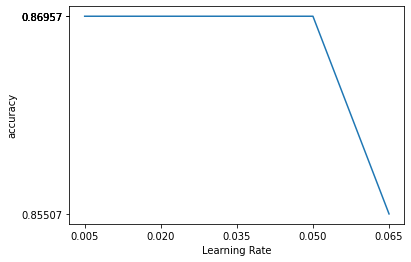

In [179]:
plt.plot(ks, acc)
plt.xticks(ks)
plt.yticks(acc)
plt.xlabel("Learning Rate")
plt.ylabel("accuracy")
plt.show()

# **Support Vector Machine**

In [154]:
class SVM:

    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


## **Training Model and calculating the accuracy**

In [155]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.1)
X_train=X_train.reshape(1234,224*224)
X_test=X_test.reshape(138,224*224)

In [156]:
svm  = SVM()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
for i in range(len(predictions)):
  if predictions[i] == -1:
    predictions[i]=0

acc = np.sum(predictions==y_test)/len(y_test)
print("SVM classification accuracy",acc)


SVM classification accuracy 0.9057971014492754


## **Graph**

In [157]:
ks = []
acc = []
for i in tqdm(range(1,15,3)):
  svm = SVM(learning_rate=i/200)
  svm.fit(X_train,y_train)
  y_pred = svm.predict(X_test)
  for i in range(len(y_pred)):
    if y_pred[i] == -1:
      y_pred[i]=0
  acc.append(accuracy(y_pred, y_test))
  ks.append(i/200)

  0%|          | 0/5 [00:00<?, ?it/s]

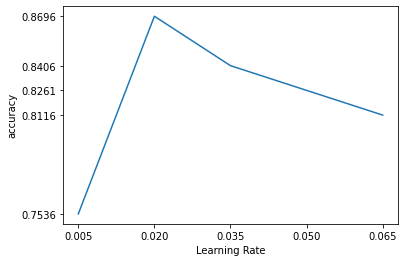

In [175]:
plt.plot(ks, acc)
plt.xticks(ks)
plt.yticks(acc)
plt.xlabel("Learning Rate")
plt.ylabel("accuracy")
plt.show()

# **Neural Network**

In [159]:
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.1)
X_train=X_train.reshape(1234,224*224)
X_train_reshaped=X_train.reshape(X_train.shape[0],-1).T

X_test=X_test.reshape(138,224*224)
X_test_reshaped=X_test.reshape(X_test.shape[0],-1).T

In [161]:
X_train_reshaped

array([[  4, 169, 116, ...,  30,  83, 134],
       [  4, 180, 112, ...,  77,  87, 244],
       [  4, 184, 111, ...,  19,  89, 108],
       ...,
       [218,  23,  90, ..., 235, 173,  83],
       [219,  22,  69, ..., 234, 189,  94],
       [218,  19,  69, ..., 233, 180,  90]], dtype=uint8)

In [162]:
X_train2 = X_train_reshaped / 255
X_test2 = X_test_reshaped / 255

In [163]:
def sigmoid(z):
  s = 1/(1+np.exp(-z))
  return s
def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim, 1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [164]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1/m) * np.sum(Y * np.log(A) + (1-Y) * (np.log(1-A)))
    
    dw = (1/m) * np.dot(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw': dw, 'db': db}
    
    return grads, cost

In [165]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [166]:
print("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


In [167]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):

    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters['w']
    b = parameters['b']

    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {'costs': costs,
         'Y_prediction_test': Y_prediction_test,
         'Y_prediction_train': Y_prediction_train,
         'w': w,
         'b': b,
         'learning_rate': learning_rate,
         'num_iterations': num_iterations}
    
    return d

In [168]:
d = model(X_train2, y_train, X_test2, y_test, num_iterations = 5000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


Cost after iteration 100: nan
Cost after iteration 200: nan
Cost after iteration 300: 1.319803
Cost after iteration 400: 1.162540
Cost after iteration 500: 1.028581
Cost after iteration 600: 0.904440
Cost after iteration 700: 0.438141
Cost after iteration 800: 0.485693
Cost after iteration 900: 1.634355
Cost after iteration 1000: 0.277662
Cost after iteration 1100: 0.218249
Cost after iteration 1200: 1.397124
Cost after iteration 1300: 0.118965
Cost after iteration 1400: 0.178728
Cost after iteration 1500: 0.099911
Cost after iteration 1600: 0.080074
Cost after iteration 1700: 0.070869
Cost after iteration 1800: 0.064691
Cost after iteration 1900: 0.060217
Cost after iteration 2000: 0.056762
Cost after iteration 2100: 0.053955
Cost after iteration 2200: 0.051591
Cost after iteration 2300: 0.049548
Cost after iteration 2400: 0.047748
Cost after iteration 2500: 0.046138
Cost after iteration 2600: 0.044680
Cost after iteration 2700: 0.043348
Cost after iteration 2800: 0.042120
Cost after 

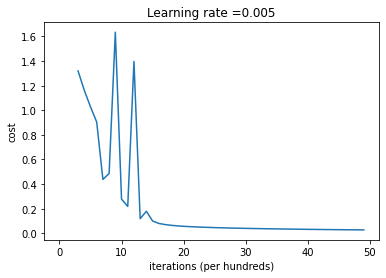

In [169]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()